<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/InterInSerieA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [8]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile('INTER.xlsx')
serie_a = pd.read_excel(df, 'Serie A results')
serie_a.tail(10)

,League name,Season,Year,Pld,W,D,L,GF,GA,Pts,Position
100,Serie A,2014–15,2015,38,14,13,11,59,48,55,8
101,Serie A,2015–16,2016,38,20,7,11,50,38,67,4
102,Serie A,2016–17,2017,38,19,5,14,72,49,62,7
103,Serie A,2017–18,2018,38,20,12,6,66,30,72,4
104,Serie A,2018–19,2019,38,20,9,9,57,33,69,4
105,Serie A,2019–20,2020,38,24,10,4,81,36,82,2
106,Serie A,2020–21,2021,38,28,7,3,89,35,91,1
107,Serie A,2021–22,2022,38,25,9,4,84,32,84,2
108,Serie A,2022–23,2023,38,23,3,12,71,42,72,3
109,Serie A,2023–24,2024,38,29,7,2,89,22,94,1


In [9]:
# Displaying the number of rows and columns in the dataset:
serie_a.shape

(110, 11)

In [10]:
# Displaying statistical data of the numerical data present in the dataset:
serie_a.describe()

,Year,Pld,W,D,L,GF,GA,Pts,Position
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1968.681818,31.927273,16.218182,8.318182,7.390909,57.290909,34.372727,46.218182,3.981818
std,33.036519,6.226179,5.410458,3.485045,3.535133,19.101537,11.065990,18.178211,2.739389
min,1909.000000,2.000000,0.000000,0.000000,1.000000,2.000000,5.000000,0.000000,1.000000
25%,1940.250000,30.000000,13.000000,7.000000,5.000000,44.000000,26.000000,35.000000,2.000000
50%,1969.500000,34.000000,15.000000,8.000000,7.000000,57.000000,34.000000,42.000000,3.000000
75%,1996.750000,34.000000,20.000000,10.000000,10.000000,67.000000,38.750000,54.750000,5.000000
max,2024.000000,40.000000,30.000000,18.000000,19.000000,113.000000,69.000000,97.000000,13.000000


# **Plotting basic column data**

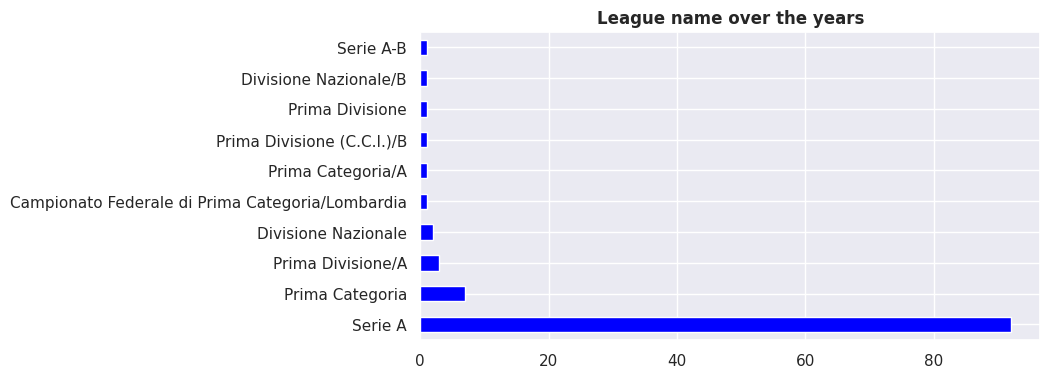

In [11]:
# Displaying Italian League names:
serie_a['League name'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('League name over the years', fontweight = 'bold')
plt.show()

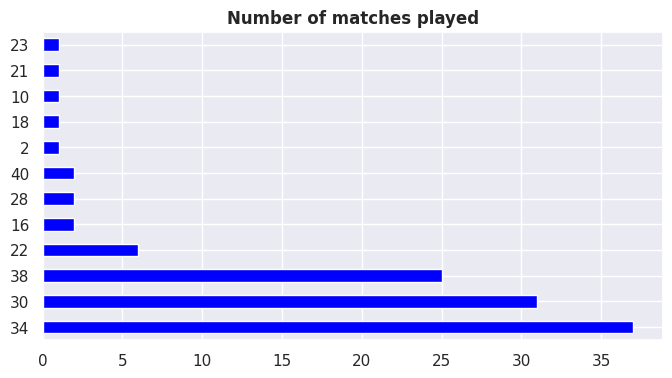

In [12]:
# Displaying number of matches played:
serie_a['Pld'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Number of matches played', fontweight = 'bold')
plt.show()

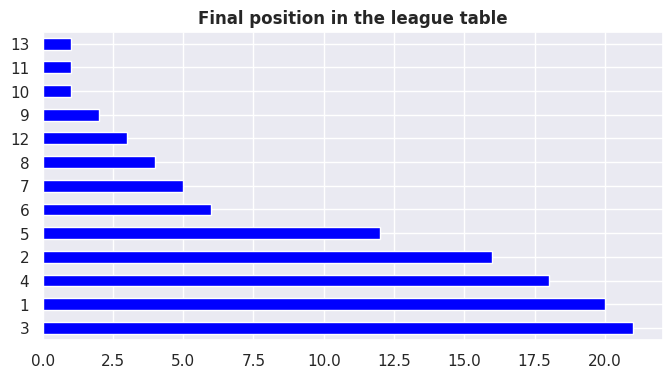

In [24]:
# Displaying the final position in the league table:
serie_a['Position'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 4))
plt.ylabel(None)
plt.title('Final position in the league table', fontweight = 'bold')
plt.show()

# **Generating new table columns**

In [18]:
# Calculating the win percentage:
def win_percentage(row):
  played = row['Pld']
  win = row['W']
  if win >= (played / 2):
    result = '50 or more percent of wins'
  else:
    result = 'Under 50 percent of wins'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
serie_a['Win %'] = serie_a.apply(win_percentage, axis=1)
serie_a.tail()

,League name,Season,Year,Pld,W,D,L,GF,GA,Pts,Position,Win %,GD
105,Serie A,2019–20,2020,38,24,10,4,81,36,82,2,50 or more percent of wins,45
106,Serie A,2020–21,2021,38,28,7,3,89,35,91,1,50 or more percent of wins,54
107,Serie A,2021–22,2022,38,25,9,4,84,32,84,2,50 or more percent of wins,52
108,Serie A,2022–23,2023,38,23,3,12,71,42,72,3,50 or more percent of wins,29
109,Serie A,2023–24,2024,38,29,7,2,89,22,94,1,50 or more percent of wins,67


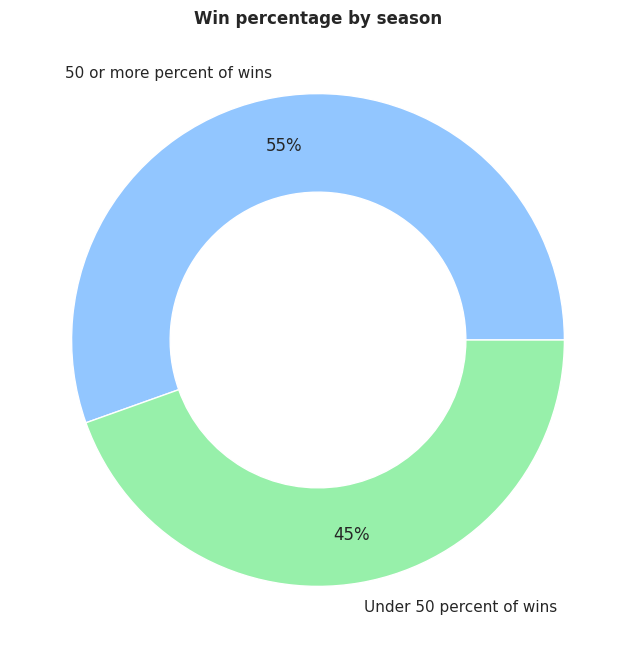

In [19]:
# Displaying the win percentages by season:
serie_a['Win %'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Win percentage by season', fontweight = 'bold')
plt.show()

In [20]:
# Calculating the difference:
def goal_difference(row):
  gs = row['GF']
  ga = row['GA']
  gd = gs -ga
  return gd

# Applying the function above on a column of the dataset and generating a new column as result:
serie_a['GD'] = serie_a.apply(goal_difference, axis=1)
serie_a.tail()

,League name,Season,Year,Pld,W,D,L,GF,GA,Pts,Position,Win %,GD
105,Serie A,2019–20,2020,38,24,10,4,81,36,82,2,50 or more percent of wins,45
106,Serie A,2020–21,2021,38,28,7,3,89,35,91,1,50 or more percent of wins,54
107,Serie A,2021–22,2022,38,25,9,4,84,32,84,2,50 or more percent of wins,52
108,Serie A,2022–23,2023,38,23,3,12,71,42,72,3,50 or more percent of wins,29
109,Serie A,2023–24,2024,38,29,7,2,89,22,94,1,50 or more percent of wins,67


In [21]:
# Analysing the goal difference performance:
def goal_difference_performance(row):
  gd = row['GD']

  if gd >= 60:
    gd_performance = 'Amazing goal difference'
  elif gd >= 40 and gd < 60:
    gd_performance = 'Good goal difference'
  elif gd >= 20 and gd < 40:
    gd_performance = 'Bad goal difference'
  else:
    gd_performance = 'Rubbish difference'
  return gd_performance

# Applying the function above on a column of the dataset and generating a new column as result:
serie_a['Goal difference performance'] = serie_a.apply(goal_difference_performance, axis=1)
serie_a.tail()

,League name,Season,Year,Pld,W,D,L,GF,GA,Pts,Position,Win %,GD,Goal difference performance
105,Serie A,2019–20,2020,38,24,10,4,81,36,82,2,50 or more percent of wins,45,Good goal difference
106,Serie A,2020–21,2021,38,28,7,3,89,35,91,1,50 or more percent of wins,54,Good goal difference
107,Serie A,2021–22,2022,38,25,9,4,84,32,84,2,50 or more percent of wins,52,Good goal difference
108,Serie A,2022–23,2023,38,23,3,12,71,42,72,3,50 or more percent of wins,29,Bad goal difference
109,Serie A,2023–24,2024,38,29,7,2,89,22,94,1,50 or more percent of wins,67,Amazing goal difference


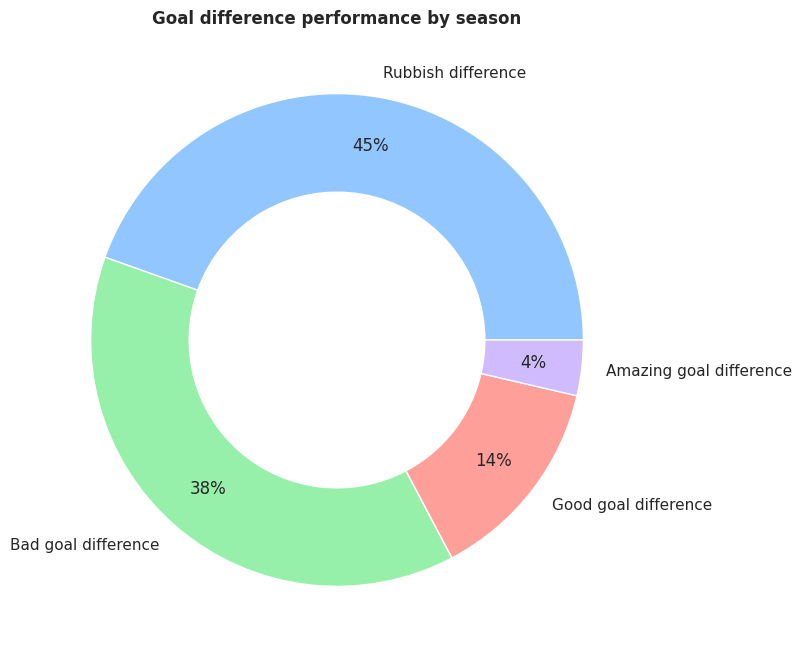

In [22]:
# Displaying the goal difference performance by season:
serie_a['Goal difference performance'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Goal difference performance by season', fontweight = 'bold')
plt.show()

In [23]:
# Displaying statistical data of the numerical data present in the dataset after the new columns were added to the dataset:
serie_a.describe()

,Year,Pld,W,D,L,GF,GA,Pts,Position,GD
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1968.681818,31.927273,16.218182,8.318182,7.390909,57.290909,34.372727,46.218182,3.981818,22.918182
std,33.036519,6.226179,5.410458,3.485045,3.535133,19.101537,11.065990,18.178211,2.739389,18.942274
min,1909.000000,2.000000,0.000000,0.000000,1.000000,2.000000,5.000000,0.000000,1.000000,-37.000000
25%,1940.250000,30.000000,13.000000,7.000000,5.000000,44.000000,26.000000,35.000000,2.000000,8.250000
50%,1969.500000,34.000000,15.000000,8.000000,7.000000,57.000000,34.000000,42.000000,3.000000,22.000000
75%,1996.750000,34.000000,20.000000,10.000000,10.000000,67.000000,38.750000,54.750000,5.000000,35.750000
max,2024.000000,40.000000,30.000000,18.000000,19.000000,113.000000,69.000000,97.000000,13.000000,76.000000
